In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print('libraries imported successfully')

libraries imported successfully


In [4]:
#loading data set
file_path = '/Users/srinivas/Documents/2026/project/SampleSuperstore.csv'
df = pd.read_csv(file_path, encoding = 'latin-1')

#Display basic info
print(f"Dataset shape: {df.shape}")
print(f"\n First few rows:")
df.head()

Dataset shape: (9994, 13)

 First few rows:


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
#check datatype and missing values

print("=" * 50)
print("DATA OVERVIEW")
print("=" * 50)
print(df.info())
print("\n" + "=" * 50)
print("MISSING VALUES")
print("=" * 50)
print(df.isnull().sum())
print("\n" + "=" * 50)
print("BASIC STATISTICS")
print("=" * 50)
print(df.describe())

DATA OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None

MISSING VALUES
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-

In [7]:
# Create additional features for analysis
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100
df['Revenue per Unit'] = df['Sales'] / df['Quantity']
df['Discount Category'] = pd.cut(df['Discount'], 
                                   bins=[0, 0.1, 0.2, 0.3, 1.0],
                                   labels=['No Discount', 'Low (0-10%)', 'Medium (10-20%)', 'High (20%+)'])

# Check for any data quality issues
print("=" * 50)
print("PROFIT MARGIN DISTRIBUTION")
print("=" * 50)
print(df['Profit Margin'].describe())

print("\n" + "=" * 50)
print("NEGATIVE PROFIT TRANSACTIONS")
print("=" * 50)
print(f"Count: {len(df[df['Profit'] < 0])}")
print(f"Percentage: {len(df[df['Profit'] < 0]) / len(df) * 100:.2f}%")

print("\n" + "=" * 50)
print("NEW COLUMNS CREATED")
print("=" * 50)
print(df[['Sales', 'Profit', 'Profit Margin', 'Revenue per Unit', 'Discount Category']].head(10))

PROFIT MARGIN DISTRIBUTION
count    9994.000000
mean       12.031393
std        46.675435
min      -275.000000
25%         7.500000
50%        27.000000
75%        36.250000
max        50.000000
Name: Profit Margin, dtype: float64

NEGATIVE PROFIT TRANSACTIONS
Count: 1871
Percentage: 18.72%

NEW COLUMNS CREATED
      Sales    Profit  Profit Margin  Revenue per Unit Discount Category
0  261.9600   41.9136          16.00          130.9800               NaN
1  731.9400  219.5820          30.00          243.9800               NaN
2   14.6200    6.8714          47.00            7.3100               NaN
3  957.5775 -383.0310         -40.00          191.5155       High (20%+)
4   22.3680    2.5164          11.25           11.1840       Low (0-10%)
5   48.8600   14.1694          29.00            6.9800               NaN
6    7.2800    1.9656          27.00            1.8200               NaN
7  907.1520   90.7152          10.00          151.1920       Low (0-10%)
8   18.5040    5.7825         

In [8]:
# Question 1: Which regions are most profitable?
print("=" * 60)
print("REGIONAL PERFORMANCE")
print("=" * 60)
region_analysis = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).round(2)
region_analysis['Profit Margin %'] = (region_analysis['Profit'] / region_analysis['Sales'] * 100).round(2)
region_analysis = region_analysis.sort_values('Profit', ascending=False)
print(region_analysis)

# Question 2: Which categories drive the most revenue?
print("\n" + "=" * 60)
print("CATEGORY PERFORMANCE")
print("=" * 60)
category_analysis = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).round(2)
category_analysis['Profit Margin %'] = (category_analysis['Profit'] / category_analysis['Sales'] * 100).round(2)
category_analysis = category_analysis.sort_values('Sales', ascending=False)
print(category_analysis)

# Question 3: Which sub-categories are most/least profitable?
print("\n" + "=" * 60)
print("TOP 5 MOST PROFITABLE SUB-CATEGORIES")
print("=" * 60)
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
print(subcategory_profit.head())

print("\n" + "=" * 60)
print("TOP 5 LEAST PROFITABLE SUB-CATEGORIES")
print("=" * 60)
print(subcategory_profit.tail())

# Question 4: How does discount impact profit?
print("\n" + "=" * 60)
print("DISCOUNT IMPACT ON PROFITABILITY")
print("=" * 60)
discount_impact = df.groupby('Discount Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).round(2)
discount_impact['Profit Margin %'] = (discount_impact['Profit'] / discount_impact['Sales'] * 100).round(2)
print(discount_impact)

REGIONAL PERFORMANCE
             Sales     Profit  Quantity  Profit Margin %
Region                                                  
West     725457.82  108418.45     12266            14.94
East     678781.24   91522.78     10618            13.48
South    391721.90   46749.43      6209            11.93
Central  501239.89   39706.36      8780             7.92

CATEGORY PERFORMANCE
                     Sales     Profit  Quantity  Profit Margin %
Category                                                        
Technology       836154.03  145454.95      6939            17.40
Furniture        741999.80   18451.27      8028             2.49
Office Supplies  719047.03  122490.80     22906            17.04

TOP 5 MOST PROFITABLE SUB-CATEGORIES
Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: Profit, dtype: float64

TOP 5 LEAST PROFITABLE SUB-CATEGORIES
Sub-Category
Machines      3384.7569
Fast

/var/folders/8c/6nk65jm55bs6l4bp0h2j3l100000gn/T/ipykernel_9035/2299361583.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_impact = df.groupby('Discount Category').agg({


✅ Charts saved as 'superstore_analysis.png'


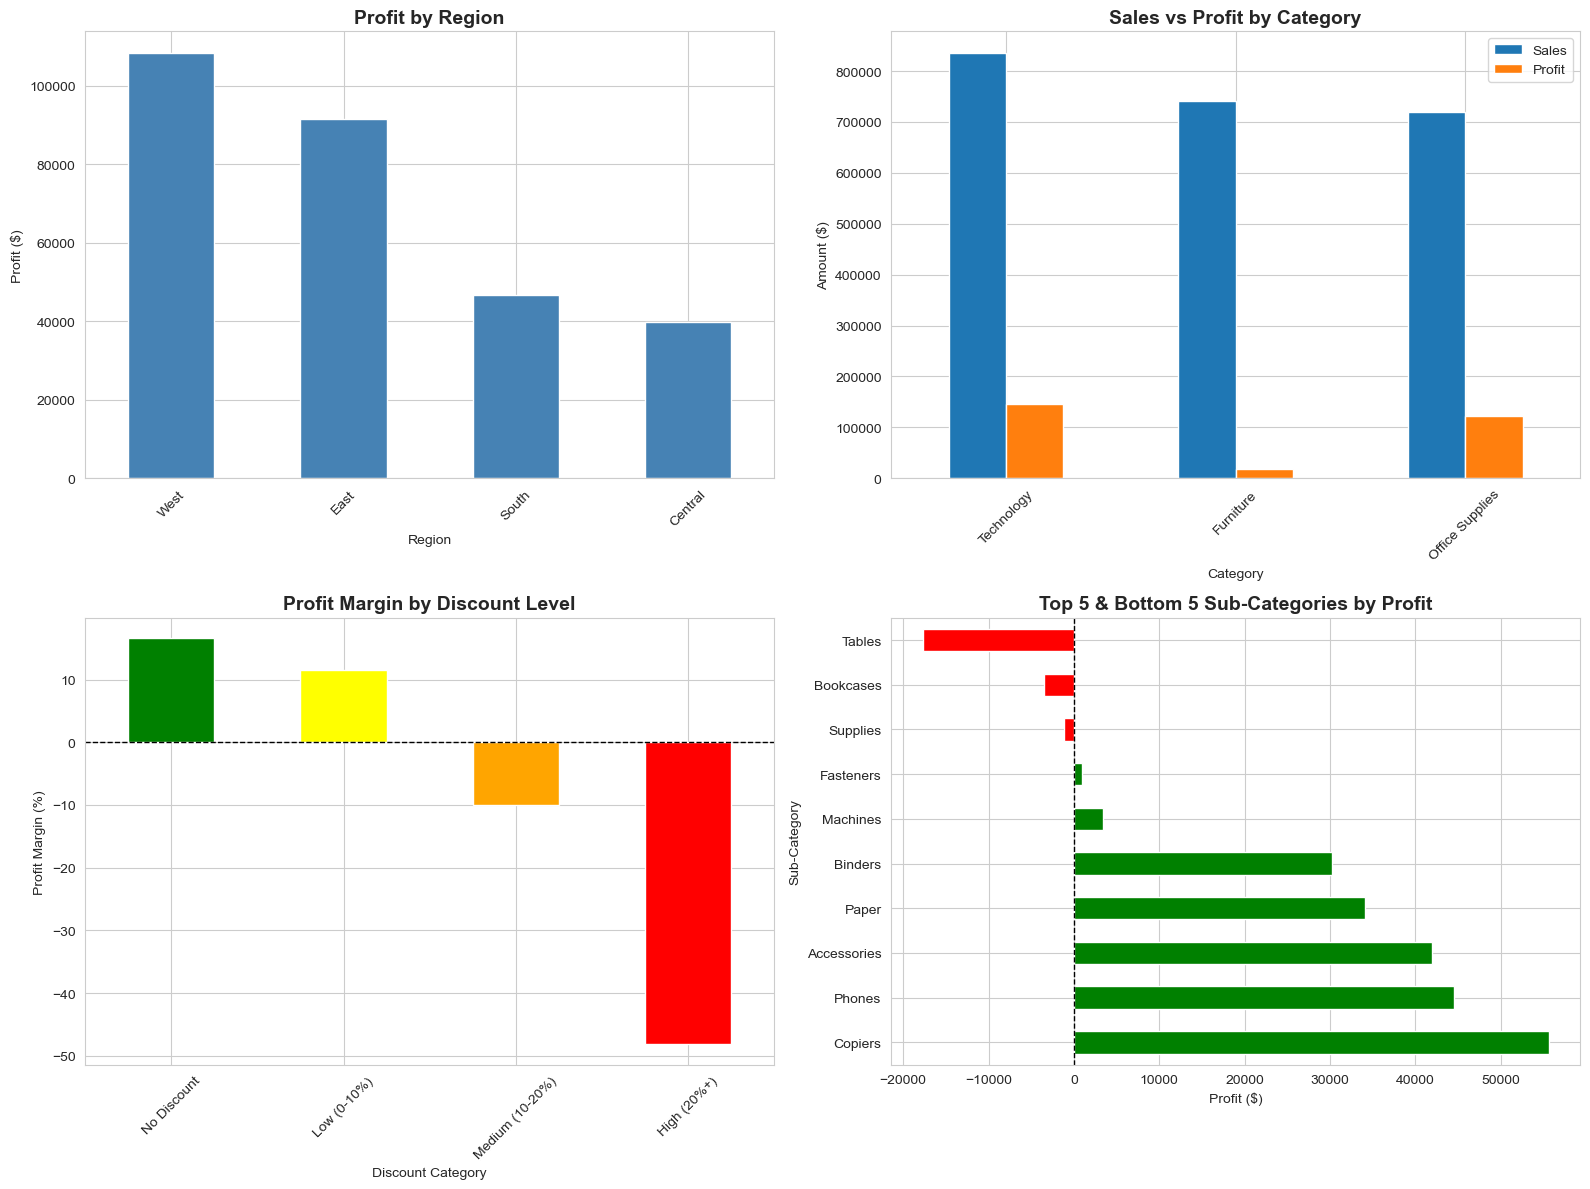

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Chart 1: Regional Performance
region_analysis.plot(kind='bar', y='Profit', ax=axes[0, 0], color='steelblue', legend=False)
axes[0, 0].set_title('Profit by Region', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Region')
axes[0, 0].set_ylabel('Profit ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Chart 2: Category Performance
category_analysis.plot(kind='bar', y=['Sales', 'Profit'], ax=axes[0, 1])
axes[0, 1].set_title('Sales vs Profit by Category', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Amount ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Chart 3: Discount Impact
discount_impact['Profit Margin %'].plot(kind='bar', ax=axes[1, 0], color=['green', 'yellow', 'orange', 'red'])
axes[1, 0].set_title('Profit Margin by Discount Level', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Discount Category')
axes[1, 0].set_ylabel('Profit Margin (%)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=1)

# Chart 4: Top/Bottom Sub-Categories
top_bottom_subcat = pd.concat([subcategory_profit.head(5), subcategory_profit.tail(5)])
colors = ['green' if x > 0 else 'red' for x in top_bottom_subcat.values]
top_bottom_subcat.plot(kind='barh', ax=axes[1, 1], color=colors, legend=False)
axes[1, 1].set_title('Top 5 & Bottom 5 Sub-Categories by Profit', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Profit ($)')
axes[1, 1].axvline(x=0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.savefig('superstore_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Charts saved as 'superstore_analysis.png'")
plt.show()

In [10]:
# Save cleaned dataset for Tableau
df.to_csv('superstore_cleaned.csv', index=False)
print("✅ Cleaned dataset saved as 'superstore_cleaned.csv'")
print(f"📊 Total rows: {len(df)}")
print(f"📊 Total columns: {len(df.columns)}")
print("\n✅ Ready for Tableau visualization!")

✅ Cleaned dataset saved as 'superstore_cleaned.csv'
📊 Total rows: 9994
📊 Total columns: 16

✅ Ready for Tableau visualization!
